In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os, random, shutil, time
import seaborn as sns
from statannot import add_stat_annotation

import warnings
warnings.filterwarnings('ignore')

import sys

#mac
util_path = "/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/util"

#constance
'''
args = sys.argv[0:]
py_file = args[0]
py_file_wo_path = os.path.basename(py_file)
z
code_location = os.path.dirname(os.path.abspath(py_file))
index_of_latest = code_location.index('latest')
util_path = os.path.join(code_location[:index_of_latest], "latest", "util")
print ("util_path:"+ str(util_path))
'''

sys.path.insert(0, util_path)

In [7]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/code/latest/2_bmd/3_after_bmd/phsae_I_II/merge_MOV1_AUC1_MOVx_AUCx_and_analyze


In [8]:
# phase I && II - LPR - after_merging - 240 timepoints - BMD from MOV1, AUC1
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/output/LPR/240_timepoints_186_chemicals/BMD_from_MOV1_AUC1/bmd_vals_2021_06_21.csv'

df_BMD_MOV1_AUC1 = pd.read_csv(complete_file_path, header = 0)
display(df_BMD_MOV1_AUC1.head())

,Chemical_ID,End_Point,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag,BMD_Analysis_Flag,BMD10_Flag,BMD50_Flag
0,1030,MOV1,NaN,NaN,NaN,NaN,18.681734,0.0,50.0,0.373635,1,NaN,NaN,NaN
1,1030,AUC1,NaN,NaN,NaN,NaN,16.869375,0.0,50.0,0.337387,1,NaN,NaN,NaN
2,1031,MOV1,quantal_linear,10.344586,6.075361,68.055101,24.805868,0.0,50.0,0.496117,2,0.0,0.0,1.0
3,1031,AUC1,logistic,20.008143,14.567697,52.924446,13.110494,0.0,50.0,0.262210,4,0.0,0.0,1.0
4,1105,MOV1,log_logistic,0.139150,NaN,98.806696,48.158040,0.0,100.0,0.481580,4,2.0,-1.0,0.0


In [9]:
# phase I && II - LPR - after_merging - 240 timepoints - BMD from MOV2~4, AUC2~4
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/output/LPR/240_timepoints_186_chemicals/BMD_from_MOV_AUC_2_3_4/bmd_vals_2021_06_22.csv'

df_BMD_MOVx_AUCx = pd.read_csv(complete_file_path, header = 0)
display(df_BMD_MOVx_AUCx.head())

,Chemical_ID,End_Point,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag,BMD_Analysis_Flag,BMD10_Flag,BMD50_Flag
0,1030,MOV2,NaN,NaN,NaN,NaN,15.432520,0.0,50.0,0.308650,1,NaN,NaN,NaN
1,1030,AUC2,NaN,NaN,NaN,NaN,14.208036,0.0,50.0,0.284161,1,NaN,NaN,NaN
2,1030,MOV3,log_probit,0.0,NaN,0.352,26.162137,0.0,50.0,0.523243,4,0.0,-1.0,-1.0
3,1030,AUC3,NaN,NaN,NaN,NaN,8.539286,0.0,50.0,0.170786,1,NaN,NaN,NaN
4,1030,MOV4,weibull,0.0,NaN,0.000,38.641976,0.0,50.0,0.772840,4,0.0,-1.0,-1.0


In [10]:
# merge dfs
frames = [df_BMD_MOV1_AUC1, df_BMD_MOVx_AUCx]

df_all = pd.concat(frames)
display(df_all.head())

display(len(np.unique(df_all['Chemical_ID'])))
display(np.unique(df_all['Chemical_ID']))

,Chemical_ID,End_Point,Model,BMD10,BMDL,BMD50,AUC,Min_Dose,Max_Dose,AUC_Norm,DataQC_Flag,BMD_Analysis_Flag,BMD10_Flag,BMD50_Flag
0,1030,MOV1,NaN,NaN,NaN,NaN,18.681734,0.0,50.0,0.373635,1,NaN,NaN,NaN
1,1030,AUC1,NaN,NaN,NaN,NaN,16.869375,0.0,50.0,0.337387,1,NaN,NaN,NaN
2,1031,MOV1,quantal_linear,10.344586,6.075361,68.055101,24.805868,0.0,50.0,0.496117,2,0.0,0.0,1.0
3,1031,AUC1,logistic,20.008143,14.567697,52.924446,13.110494,0.0,50.0,0.262210,4,0.0,0.0,1.0
4,1105,MOV1,log_logistic,0.139150,NaN,98.806696,48.158040,0.0,100.0,0.481580,4,2.0,-1.0,0.0


186

array([  53,   54,   56,   57,   58,   60,   61,   62,   63,   64,   65,
         66,   67,   69,   70,  129,  155,  220,  227,  246,  247,  248,
        250,  251,  252,  281,  283,  285,  286,  295,  296,  297,  360,
        365,  381,  384,  392,  404,  406,  409,  412,  414,  415,  416,
        417,  418,  419,  420,  441,  447,  448,  500,  501,  502,  503,
        504,  511,  512,  513,  514,  515,  517,  596,  597,  601,  602,
        609,  618,  628,  629,  667,  674,  689,  691,  694,  696,  697,
        721,  722,  741,  746,  747,  768,  769,  770,  771,  774,  775,
        776,  777,  778,  946,  947,  948,  949,  952,  961,  965,  966,
        998, 1030, 1031, 1105, 1114, 1161, 1163, 1166, 1171, 1172, 1174,
       1175, 1176, 1177, 1178, 1179, 1180, 1182, 1211, 1221, 1307, 1316,
       1354, 1370, 1371, 1449, 1595, 1603, 1610, 1611, 1612, 1613, 1614,
       1615, 1617, 1618, 1620, 1629, 1651, 1670, 1770, 1854, 1855, 1861,
       1930, 1965, 1967, 2058, 2067, 2142, 2323, 23

In [25]:
def compare_array(array1, array2):
    same = 0
    diff = 0 
    for i in range(len(array1)):
        for j in range(len(array2)):
            if array1[i] == array2[j]:
                same += 1
            else:
                diff += 1
    #print (same)
    #print (diff)
    #identity_percentage = 100 * same / len(array1)
    identity_percentage = 100 * (same / (len(array1)*len(array2))) * len(array1)
    print_this = "Between " + str(array1) + " and " + str(array2) + ", identity %:" + str(round(identity_percentage,1))
    print (print_this)
    return identity_percentage
    
def Nmaxelements(list1, N):
    final_list = []
  
    for i in range(0, N): 
        max1 = 0
          
        for j in range(len(list1)):     
            if list1[j] > max1:
                max1 = list1[j];
                  
        list1.remove(max1);
        final_list.append(max1)
          
    return final_list
    
def selection_sort(x):
    for i in range(len(x)):
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [158]:
limit_value = False

filt = df_all['End_Point'] == 'AUC1'
df_BMD10_from_AUC1 = df_all.loc[filt]['BMD10']
df_from_AUC1 = df_all.loc[filt][['Chemical_ID','BMD10']]
df_from_AUC1.dropna(inplace=True)

if (limit_value):
    df_BMD10_from_AUC1 = df_BMD10_from_AUC1[df_BMD10_from_AUC1 < 500]

filt = df_all['End_Point'] == 'AUC2'
df_BMD10_from_AUC2 = df_all.loc[filt]['BMD10']
df_from_AUC2 = df_all.loc[filt][['Chemical_ID','BMD10']]
df_from_AUC2.dropna(inplace=True)
if (limit_value):
    df_BMD10_from_AUC2 = df_BMD10_from_AUC2[df_BMD10_from_AUC2 < 500]

filt = df_all['End_Point'] == 'AUC3'
df_BMD10_from_AUC3 = df_all.loc[filt]['BMD10']
df_from_AUC3 = df_all.loc[filt][['Chemical_ID','BMD10']]
df_from_AUC3.dropna(inplace=True)
if (limit_value):
    df_BMD10_from_AUC3 = df_BMD10_from_AUC3[df_BMD10_from_AUC3 < 500]

filt = df_all['End_Point'] == 'AUC4'
df_BMD10_from_AUC4 = df_all.loc[filt]['BMD10']
df_from_AUC4 = df_all.loc[filt][['Chemical_ID','BMD10']]
df_from_AUC4.dropna(inplace=True)
if (limit_value):
    df_BMD10_from_AUC4 = df_BMD10_from_AUC4[df_BMD10_from_AUC4 < 500]
    
df_from_AUC1.head()

,Chemical_ID,BMD10
3,1031,20.008143
5,1105,0.005401
7,1114,0.306498
9,1161,0.229200
11,1163,0.585637


In [161]:
## prepare array_per_chemical_total

# merge dfs
frames = [df_from_AUC1, df_from_AUC2, df_from_AUC3, df_from_AUC4]
df_all_BMD10 = pd.concat(frames)

#print (np.unique(df_all_BMD10['Chemical_ID']))

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_all_BMD10['Chemical_ID'])
else:
    chemical_id_from_here = [53, 1031]

array_per_chemical_total_AUC = []

for chemical_id in chemical_id_from_here:
    #print ("\nchemical_id:", chemical_id)
    array_per_chemical = []
    
    extracted = df_from_AUC1.loc[df_from_AUC1['Chemical_ID'] == chemical_id]['BMD10']
    if (len(extracted) == 0):
        array_per_chemical.append(None)
    else:
        array_per_chemical.append(df_from_AUC1.loc[df_from_AUC1['Chemical_ID'] == chemical_id]['BMD10'].item())
    
    extracted = df_from_AUC2.loc[df_from_AUC2['Chemical_ID'] == chemical_id]['BMD10']
    if (len(extracted) == 0):
        array_per_chemical.append(None)
    else:
        array_per_chemical.append(df_from_AUC2.loc[df_from_AUC2['Chemical_ID'] == chemical_id]['BMD10'].item())
    
    extracted = df_from_AUC3.loc[df_from_AUC3['Chemical_ID'] == chemical_id]['BMD10']
    if (len(extracted) == 0):
        array_per_chemical.append(None)
    else:
        array_per_chemical.append(df_from_AUC3.loc[df_from_AUC3['Chemical_ID'] == chemical_id]['BMD10'].item())
        
    extracted = df_from_AUC4.loc[df_from_AUC4['Chemical_ID'] == chemical_id]['BMD10']
    if (len(extracted) == 0):
        array_per_chemical.append(None)
    else:
        array_per_chemical.append(df_from_AUC4.loc[df_from_AUC4['Chemical_ID'] == chemical_id]['BMD10'].item())
        
    array_per_chemical_total_AUC.append(array_per_chemical)
    #print (array_per_chemical)
#print (array_per_chemical_total_AUC)
print ("done")

done


No handles with labels found to put in legend.


       std of each row (e.g BMD10 change across AUCx)
count                                      114.000000
mean                                       489.308212
std                                       2886.543473
min                                          0.000000
25%                                          0.271931
50%                                          2.130572
75%                                          8.725336
max                                      19383.779319
median: std of each row (e.g BMD10 change across AUCx)    2.130572
dtype: float64


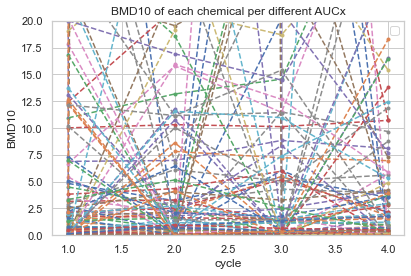

In [168]:
# Draw BMD10 changes across AUCx
x = [1,2,3,4]

limit_count = 0
std_array = []
for i in range(len(array_per_chemical_total_AUC)):
    limit_count += 1
    if (limit_count > 20):
        #break
        pass   
    if (None in array_per_chemical_total_AUC[i]) == True:
        continue
    std_array.append(np.std(array_per_chemical_total_AUC[i]))
    plt.plot(x, array_per_chemical_total_AUC[i], linestyle='--', marker='.')

df_wo_na = pd.DataFrame(std_array, columns=['std of each row (e.g BMD10 change across AUCx)'])
print (df_wo_na.describe())
print ("median:", df_wo_na.median())
plt.xlabel('cycle')
plt.ylabel('BMD10')
plt.title('BMD10 of each chemical per different AUCx')

plt.legend()

plt.tight_layout()
plt.ylim((0, 20))
plt.show()

In [44]:
df_temp = df_all[df_all['End_Point'].str.contains("AUC")]
df_temp = df_temp.groupby(['End_Point'])['BMD10']
#df_temp.describe()

1           NaN
3     20.008143
5      0.005401
7      0.306498
9      0.229200
1           NaN
3           NaN
5           NaN
7     16.918969
9     14.469998
11    31.304995
13     0.282565
15    36.886471
17     2.914711
19     0.654378
21     0.396184
23     0.817667
25    10.038381
27     4.625784
29    11.895406
Name: BMD10, dtype: float64

In [29]:
## Identify chemical_ID_per_AUCx_with_highest_BMD10
start_time = time.time()

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_all['Chemical_ID'])
else:
    chemical_id_from_here = [1030]
    
N_best = 50

array_AUC1 = []
array_AUC2 = []
array_AUC3 = []
array_AUC4 = []
    
for chemical_id in chemical_id_from_here:
    #print ("\nchemical_id:", chemical_id)
    df_per_chemical = df_all.loc[df_all['Chemical_ID'] == chemical_id]
        
    df_per_chemical_AUC1 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'AUC1']
    df_per_chemical_AUC1 = df_per_chemical_AUC1.dropna(subset=['BMD10'])
    if (len(df_per_chemical_AUC1['BMD10']) != 0):
        array_AUC1.append(float(df_per_chemical_AUC1['BMD10']))
        
    df_per_chemical_AUC2 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'AUC2']
    df_per_chemical_AUC2 = df_per_chemical_AUC2.dropna(subset=['BMD10'])
    if (len(df_per_chemical_AUC2['BMD10']) != 0):
        array_AUC2.append(float(df_per_chemical_AUC2['BMD10']))
    
    df_per_chemical_AUC3 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'AUC3']
    df_per_chemical_AUC3 = df_per_chemical_AUC3.dropna(subset=['BMD10'])
    if (len(df_per_chemical_AUC3['BMD10']) != 0):
        array_AUC3.append(float(df_per_chemical_AUC3['BMD10']))

    df_per_chemical_AUC4 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'AUC4']
    df_per_chemical_AUC4 = df_per_chemical_AUC4.dropna(subset=['BMD10'])
    if (len(df_per_chemical_AUC4['BMD10']) != 0):
        array_AUC4.append(float(df_per_chemical_AUC4['BMD10']))
        
chemical_ID_per_AUC1_with_highest_BMD10 = []
best_N= Nmaxelements(array_AUC1, N_best)
for each in best_N:
    for chemical_id in chemical_id_from_here:
        df_per_chemical = df_all.loc[df_all['Chemical_ID'] == chemical_id]
        df_per_chemical_AUC1 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'AUC1']
        if ((df_per_chemical_AUC1['BMD10'].item()) == each):
            chemical_ID_per_AUC1_with_highest_BMD10.append(df_per_chemical_AUC1['Chemical_ID'].item())
            break
chemical_ID_per_AUC1_with_highest_BMD10 = selection_sort(chemical_ID_per_AUC1_with_highest_BMD10)


chemical_ID_per_AUC2_with_highest_BMD10 = []
best_N = Nmaxelements(array_AUC2, N_best)
for each in best_N:
    for chemical_id in chemical_id_from_here:
        df_per_chemical = df_all.loc[df_all['Chemical_ID'] == chemical_id]
        df_per_chemical_AUC2 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'AUC2']
        if (len(df_per_chemical_AUC2) == 0):
            continue
        if ((df_per_chemical_AUC2['BMD10'].item()) == each):
            chemical_ID_per_AUC2_with_highest_BMD10.append(df_per_chemical_AUC2['Chemical_ID'].item())
            break
chemical_ID_per_AUC2_with_highest_BMD10 = selection_sort(chemical_ID_per_AUC2_with_highest_BMD10)


chemical_ID_per_AUC3_with_highest_BMD10 = []
best_N = Nmaxelements(array_AUC3, N_best)
for each in best_N:
    for chemical_id in chemical_id_from_here:
        df_per_chemical = df_all.loc[df_all['Chemical_ID'] == chemical_id]
        df_per_chemical_AUC3 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'AUC3']
        if (len(df_per_chemical_AUC3) == 0):
            continue
        #display(df_per_chemical_AUC2)
        if ((df_per_chemical_AUC3['BMD10'].item()) == each):
            chemical_ID_per_AUC3_with_highest_BMD10.append(df_per_chemical_AUC3['Chemical_ID'].item())
            break
chemical_ID_per_AUC3_with_highest_BMD10 = selection_sort(chemical_ID_per_AUC3_with_highest_BMD10)


chemical_ID_per_AUC4_with_highest_BMD10 = []
best_10 = Nmaxelements(array_AUC4, N_best)
for each in best_10:
    for chemical_id in chemical_id_from_here:
        df_per_chemical = df_all.loc[df_all['Chemical_ID'] == chemical_id]
        df_per_chemical_AUC4 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'AUC4']
        if (len(df_per_chemical_AUC4) == 0):
            continue
        if ((df_per_chemical_AUC4['BMD10'].item()) == each):
            chemical_ID_per_AUC4_with_highest_BMD10.append(df_per_chemical_AUC4['Chemical_ID'].item())
            break
chemical_ID_per_AUC4_with_highest_BMD10 = selection_sort(chemical_ID_per_AUC4_with_highest_BMD10)

compare_array (chemical_ID_per_AUC1_with_highest_BMD10, chemical_ID_per_AUC2_with_highest_BMD10)
compare_array (chemical_ID_per_AUC2_with_highest_BMD10, chemical_ID_per_AUC3_with_highest_BMD10)
compare_array (chemical_ID_per_AUC3_with_highest_BMD10, chemical_ID_per_AUC4_with_highest_BMD10)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))

Between [53, 56, 60, 63, 155, 246, 250, 251, 281, 285, 296, 384, 392, 404, 412, 414, 501, 512, 513, 628, 691, 694, 696, 721, 741, 774, 775, 776, 952, 1031, 1176, 1182, 1211, 1221, 1371, 1670, 1770, 1861, 1967, 2067, 2325, 2601, 2739, 2973, 3004, 3005, 3091, 3102, 3273, 3757] and [60, 69, 246, 247, 281, 285, 297, 384, 392, 409, 412, 414, 513, 515, 609, 628, 667, 696, 721, 722, 741, 769, 770, 771, 774, 776, 946, 948, 949, 1031, 1161, 1172, 1177, 1182, 1211, 1307, 1370, 1371, 1615, 2067, 2327, 2532, 2635, 2973, 3004, 3005, 3091, 3114, 3140, 3412], identity %:48.0
Between [60, 69, 246, 247, 281, 285, 297, 384, 392, 409, 412, 414, 513, 515, 609, 628, 667, 696, 721, 722, 741, 769, 770, 771, 774, 776, 946, 948, 949, 1031, 1161, 1172, 1177, 1182, 1211, 1307, 1370, 1371, 1615, 2067, 2327, 2532, 2635, 2973, 3004, 3005, 3091, 3114, 3140, 3412] and [53, 60, 65, 66, 129, 246, 248, 281, 381, 384, 392, 412, 414, 420, 447, 513, 517, 596, 618, 628, 667, 691, 722, 768, 775, 948, 965, 966, 1031, 1105, 11

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

AUC1 v.s. AUC2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.172e+03
AUC2 v.s. AUC3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.306e+03
AUC3 v.s. AUC4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.208e+03
Between [53, 56, 60, 63, 155, 246, 250, 251, 281, 285, 296, 384, 392, 404, 412, 414, 501, 512, 513, 628, 691, 694, 696, 721, 741, 774, 775, 776, 952, 1031, 1176, 1182, 1211, 1221, 1371, 1670, 1770, 1861, 1967, 2067, 2325, 2601, 2739, 2973, 3004, 3005, 3091, 3102, 3273, 3757] and [60, 69, 246, 247, 281, 285, 297, 384, 392, 409, 412, 414, 513, 515, 609, 628, 667, 696, 721, 722, 741, 769, 770, 771, 774, 776, 946, 948, 949, 1031, 1161, 1172, 1177, 1182, 1211, 1307, 1370, 1371, 1615, 2067, 2327

Text(0.5, 1.0, '(phase I,II, full AUC) Mann-Whitney, AUC1 vs AUC2 vs AUC3 vs AUC4')

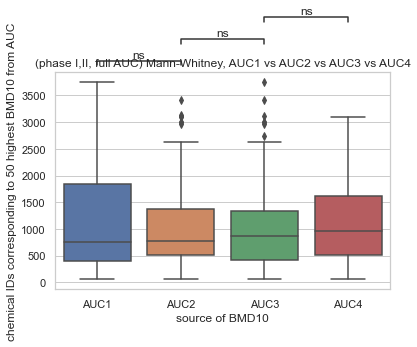

In [30]:
# box-whisker plot for BMD10 from AUC

column_name = 'chemical IDs corresponding to ' + str(N_best) + ' highest BMD10 from AUC'

df_y = pd.DataFrame(chemical_ID_per_AUC1_with_highest_BMD10, columns=[column_name])
df_y["source of BMD10"] = str("AUC1")

df_y_to_concat = pd.DataFrame(chemical_ID_per_AUC2_with_highest_BMD10, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['source of BMD10'].fillna('AUC2', inplace=True)

df_y_to_concat = pd.DataFrame(chemical_ID_per_AUC3_with_highest_BMD10, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['source of BMD10'].fillna('AUC3', inplace=True)

df_y_to_concat = pd.DataFrame(chemical_ID_per_AUC4_with_highest_BMD10, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['source of BMD10'].fillna('AUC4', inplace=True)

sns.set(style="whitegrid")
x = "source of BMD10"
y = column_name
order = ['AUC1', 'AUC2', 'AUC3', 'AUC4']
ax = sns.boxplot(data=df_y, x=x, y=y, order=order)

add_stat_annotation(ax, data=df_y, x=x, y=y, order=order,
                    box_pairs=[("AUC1", "AUC2"),("AUC2", "AUC3"),("AUC3", "AUC4")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
                    #test='t-test_ind', text_format='star', loc='outside', verbose=2)

compare_array (chemical_ID_per_AUC1_with_highest_BMD10, chemical_ID_per_AUC2_with_highest_BMD10)
compare_array (chemical_ID_per_AUC2_with_highest_BMD10, chemical_ID_per_AUC3_with_highest_BMD10)
compare_array (chemical_ID_per_AUC3_with_highest_BMD10, chemical_ID_per_AUC4_with_highest_BMD10)



plt.title('(phase I,II, full AUC) Mann-Whitney, AUC1 vs AUC2 vs AUC3 vs AUC4')
#plt.title('t-test independent samples with Bonferroni correction, AUC1 vs AUC2 vs AUC3 vs AUC4')
#plt.ylim((0, 300))

In [105]:
limit_value = False
#limit_value = True

filt = df_all['End_Point'] == 'MOV1'
df_BMD10_from_MOV1 = df_all.loc[filt]['BMD10']
df_from_MOV1 = df_all.loc[filt][['Chemical_ID','BMD10']]
if (limit_value):
    df_BMD10_from_MOV1 = df_BMD10_from_MOV1[df_BMD10_from_MOV1 < 2000]

filt = df_all['End_Point'] == 'MOV2'
df_BMD10_from_MOV2 = df_all.loc[filt]['BMD10']
df_from_MOV2 = df_all.loc[filt][['Chemical_ID','BMD10']]
if (limit_value):
    df_BMD10_from_MOV2 = df_BMD10_from_MOV2[df_BMD10_from_MOV2 < 2000]

filt = df_all['End_Point'] == 'MOV3'
df_BMD10_from_MOV3 = df_all.loc[filt]['BMD10']
df_from_MOV3 = df_all.loc[filt][['Chemical_ID','BMD10']]
if (limit_value):
    df_BMD10_from_MOV3 = df_BMD10_from_MOV3[df_BMD10_from_MOV3 < 2000]

filt = df_all['End_Point'] == 'MOV4'
df_from_MOV4 = df_all.loc[filt][['Chemical_ID','BMD10']]
df_BMD10_from_MOV4 = df_all.loc[filt]['BMD10']
if (limit_value):
    df_BMD10_from_MOV4 = df_BMD10_from_MOV4[df_BMD10_from_MOV4 < 2000]

print ("done")

done


In [170]:
## prepare array_per_chemical_total

# merge dfs
frames = [df_from_MOV1, df_from_MOV2, df_from_MOV3, df_from_MOV4]
df_all_BMD10_from_all_MOV = pd.concat(frames)

#print (np.unique(df_all_BMD10['Chemical_ID']))

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_all_BMD10['Chemical_ID'])
else:
    chemical_id_from_here = [53, 1031]

array_per_chemical_total_MOV = []

for chemical_id in chemical_id_from_here:
    #print ("\nchemical_id:", chemical_id)
    array_per_chemical = []
    
    extracted = df_from_MOV1.loc[df_from_MOV1['Chemical_ID'] == chemical_id]['BMD10']
    if (len(extracted) == 0):
        array_per_chemical.append(None)
    else:
        array_per_chemical.append(df_from_MOV1.loc[df_from_MOV1['Chemical_ID'] == chemical_id]['BMD10'].item())
    
    extracted = df_from_MOV2.loc[df_from_MOV2['Chemical_ID'] == chemical_id]['BMD10']
    if (len(extracted) == 0):
        array_per_chemical.append(None)
    else:
        array_per_chemical.append(df_from_MOV2.loc[df_from_MOV2['Chemical_ID'] == chemical_id]['BMD10'].item())
    
    extracted = df_from_MOV3.loc[df_from_MOV3['Chemical_ID'] == chemical_id]['BMD10']
    if (len(extracted) == 0):
        array_per_chemical.append(None)
    else:
        array_per_chemical.append(df_from_MOV3.loc[df_from_MOV3['Chemical_ID'] == chemical_id]['BMD10'].item())
        
    extracted = df_from_MOV4.loc[df_from_MOV4['Chemical_ID'] == chemical_id]['BMD10']
    if (len(extracted) == 0):
        array_per_chemical.append(None)
    else:
        array_per_chemical.append(df_from_MOV4.loc[df_from_MOV4['Chemical_ID'] == chemical_id]['BMD10'].item())
        
    array_per_chemical_total_MOV.append(array_per_chemical)
    #print (array_per_chemical)
print (len(array_per_chemical_total_MOV))
print ("done")

178
done


No handles with labels found to put in legend.


       std of each row (e.g BMD10 change across MOVx)
count                                      124.000000
mean                                       240.547332
std                                       1875.296118
min                                          0.000000
25%                                          0.009937
50%                                          0.216210
75%                                          2.005725
max                                      15924.604354
median: std of each row (e.g BMD10 change across MOVx)    0.21621
dtype: float64


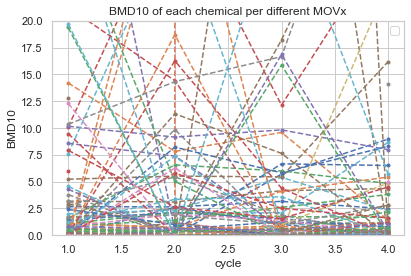

In [172]:
# Draw BMD10 changes across MOVx
x = [1,2,3,4]

limit_count = 0
std_array = []
for i in range(len(array_per_chemical_total_MOV)):
    limit_count += 1
    if (limit_count > 20):
        #break
        pass
#    if (str(np.std(array_per_chemical_total[i])) != 'nan'):
 #       std_array.append(np.std(array_per_chemical_total[i]))
    if (None in array_per_chemical_total_MOV[i]) == True:
        continue
    std_array.append(np.std(array_per_chemical_total_MOV[i]))
    plt.plot(x, array_per_chemical_total_MOV[i], linestyle='--', marker='.')

df_wo_na = pd.DataFrame(std_array, columns=['std of each row (e.g BMD10 change across MOVx)'])
print (df_wo_na.describe())
print ("median:", df_wo_na.median())
plt.xlabel('cycle')
plt.ylabel('BMD10')
plt.title('BMD10 of each chemical per different MOVx')

plt.legend()

plt.tight_layout()
plt.ylim((0, 20))
plt.show()

In [40]:
## Identify chemical_ID_per_MOVx_with_highest_BMD10
start_time = time.time()

full_devel = "full"
#full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_all['Chemical_ID'])
else:
    chemical_id_from_here = [1030]
    
N_best = 10

array_MOV1 = []
array_MOV2 = []
array_MOV3 = []
array_MOV4 = []
    
for chemical_id in chemical_id_from_here:
    df_per_chemical = df_all.loc[df_all['Chemical_ID'] == chemical_id]
        
    df_per_chemical_MOV1 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV1']
    df_per_chemical_MOV1 = df_per_chemical_MOV1.dropna(subset=['BMD10'])
    if (len(df_per_chemical_MOV1['BMD10']) != 0):
        array_MOV1.append(float(df_per_chemical_MOV1['BMD10']))
        
    df_per_chemical_MOV2 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV2']
    df_per_chemical_MOV2 = df_per_chemical_MOV2.dropna(subset=['BMD10'])
    if (len(df_per_chemical_MOV2['BMD10']) != 0):
        array_MOV2.append(float(df_per_chemical_MOV2['BMD10']))
    
    df_per_chemical_MOV3 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV3']
    df_per_chemical_MOV3 = df_per_chemical_MOV3.dropna(subset=['BMD10'])
    if (len(df_per_chemical_MOV3['BMD10']) != 0):
        array_MOV3.append(float(df_per_chemical_MOV3['BMD10']))

    df_per_chemical_MOV4 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV4']
    df_per_chemical_MOV4 = df_per_chemical_MOV4.dropna(subset=['BMD10'])
    if (len(df_per_chemical_MOV4['BMD10']) != 0):
        array_MOV4.append(float(df_per_chemical_MOV4['BMD10']))
        
chemical_ID_per_MOV1_with_highest_BMD10 = []
best_N = Nmaxelements(array_MOV1, N_best)
for each in best_N:
    for chemical_id in chemical_id_from_here:
        df_per_chemical = df_all.loc[df_all['Chemical_ID'] == chemical_id]
        df_per_chemical_MOV1 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV1']
        if ((df_per_chemical_MOV1['BMD10'].item()) == each):
            chemical_ID_per_MOV1_with_highest_BMD10.append(df_per_chemical_MOV1['Chemical_ID'].item())
            break
chemical_ID_per_MOV1_with_highest_BMD10 = selection_sort(chemical_ID_per_MOV1_with_highest_BMD10)
#display(chemical_ID_per_MOV1_with_highest_BMD10)


chemical_ID_per_MOV2_with_highest_BMD10 = []
best_N = Nmaxelements(array_MOV2, N_best)
for each in best_N:
    for chemical_id in chemical_id_from_here:
        df_per_chemical = df_all.loc[df_all['Chemical_ID'] == chemical_id]
        df_per_chemical_MOV2 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV2']
        if (len(df_per_chemical_MOV2) == 0):
            continue
        if ((df_per_chemical_MOV2['BMD10'].item()) == each):
            chemical_ID_per_MOV2_with_highest_BMD10.append(df_per_chemical_MOV2['Chemical_ID'].item())
            break
chemical_ID_per_MOV2_with_highest_BMD10 = selection_sort(chemical_ID_per_MOV2_with_highest_BMD10)
#display(chemical_ID_per_MOV2_with_highest_BMD10)


chemical_ID_per_MOV3_with_highest_BMD10 = []
best_N = Nmaxelements(array_MOV3, N_best)
for each in best_N:
    for chemical_id in chemical_id_from_here:
        df_per_chemical = df_all.loc[df_all['Chemical_ID'] == chemical_id]
        df_per_chemical_MOV3 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV3']
        if (len(df_per_chemical_MOV3) == 0):
            continue
        if ((df_per_chemical_MOV3['BMD10'].item()) == each):
            chemical_ID_per_MOV3_with_highest_BMD10.append(df_per_chemical_MOV3['Chemical_ID'].item())
            break
chemical_ID_per_MOV3_with_highest_BMD10 = selection_sort(chemical_ID_per_MOV3_with_highest_BMD10)
#display(chemical_ID_per_MOV3_with_highest_BMD10)


chemical_ID_per_MOV4_with_highest_BMD10 = []
best_N = Nmaxelements(array_MOV4, N_best)
for each in best_N:
    for chemical_id in chemical_id_from_here:
        df_per_chemical = df_all.loc[df_all['Chemical_ID'] == chemical_id]
        df_per_chemical_MOV4 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV4']
        if (len(df_per_chemical_MOV4) == 0):
            continue
        if ((df_per_chemical_MOV4['BMD10'].item()) == each):
            chemical_ID_per_MOV4_with_highest_BMD10.append(df_per_chemical_MOV4['Chemical_ID'].item())
            break
chemical_ID_per_MOV4_with_highest_BMD10 = selection_sort(chemical_ID_per_MOV4_with_highest_BMD10)
#display(chemical_ID_per_MOV4_with_highest_BMD10)

end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took))

Done, it took:4.0 seconds


Between [61, 66, 512, 609, 696, 1967, 2751, 2973, 3004, 3757] and [54, 384, 414, 609, 770, 949, 1031, 1211, 1610, 3004], identity %:20.0
Between [54, 384, 414, 609, 770, 949, 1031, 1211, 1610, 3004] and [384, 404, 966, 1031, 1174, 2973, 3004, 3005, 3091, 3757], identity %:30.0
Between [384, 404, 966, 1031, 1174, 2973, 3004, 3005, 3091, 3757] and [65, 246, 384, 409, 517, 628, 1031, 1174, 3004, 3757], identity %:50.0
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

MOV1 v.s. MOV2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=5.900e+01
MOV2 v.s. MOV3: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.360e-01 U_stat=2.850e+01
MOV3 v.s. MOV4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.505e-01 U_stat=6.950e+01


Text(0.5, 1.0, '(phase I,II, full MOV) Mann-Whitney, MOV1 vs MOV2 vs MOV3 vs MOV4')

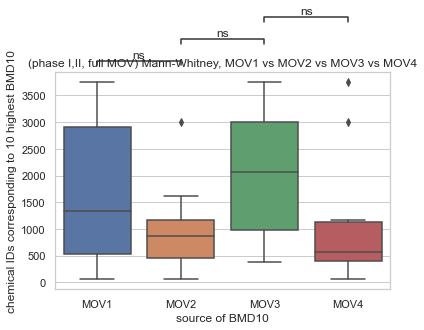

In [41]:
# box-whisker plot for BMD10 from MOV

column_name = 'chemical IDs corresponding to ' + str(N_best) + ' highest BMD10'

df_y = pd.DataFrame(chemical_ID_per_MOV1_with_highest_BMD10, columns=[column_name])
df_y["source of BMD10"] = str("MOV1")

df_y_to_concat = pd.DataFrame(chemical_ID_per_MOV2_with_highest_BMD10, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['source of BMD10'].fillna('MOV2', inplace=True)

df_y_to_concat = pd.DataFrame(chemical_ID_per_MOV3_with_highest_BMD10, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['source of BMD10'].fillna('MOV3', inplace=True)

df_y_to_concat = pd.DataFrame(chemical_ID_per_MOV4_with_highest_BMD10, columns=[column_name])
df_y = pd.concat([df_y, df_y_to_concat], axis = 0)
df_y['source of BMD10'].fillna('MOV4', inplace=True)

sns.set(style="whitegrid")
x = "source of BMD10"
y = column_name
order = ['MOV1', 'MOV2', 'MOV3', 'MOV4']
ax = sns.boxplot(data=df_y, x=x, y=y, order=order)

compare_array (chemical_ID_per_MOV1_with_highest_BMD10, chemical_ID_per_MOV2_with_highest_BMD10)
compare_array (chemical_ID_per_MOV2_with_highest_BMD10, chemical_ID_per_MOV3_with_highest_BMD10)
compare_array (chemical_ID_per_MOV3_with_highest_BMD10, chemical_ID_per_MOV4_with_highest_BMD10)


add_stat_annotation(ax, data=df_y, x=x, y=y, order=order,
                    box_pairs=[("MOV1", "MOV2"),("MOV2", "MOV3"),("MOV3", "MOV4")],
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)
                    #test='t-test_ind', text_format='star', loc='outside', verbose=2)

plt.title('(phase I,II, full MOV) Mann-Whitney, MOV1 vs MOV2 vs MOV3 vs MOV4')
#plt.title('t-test independent samples with Bonferroni correction, MOV1 vs MOV2 vs MOV3 vs MOV4')
#plt.ylim((0, 300))

In [24]:
df_temp = df_all[df_all['End_Point'].str.contains("MOV")]
df_temp = df_temp.groupby(['End_Point'])['BMD10']
df_temp.describe()

,count,mean,std,min,25%,50%,75%,max
End_Point,,,,,,,,
MOV1,163.0,421.979285,3781.247857,0.0,2.000000e-08,0.006992,1.135523,36776.306617
MOV2,159.0,2.536697,6.928007,0.0,0.000000e+00,0.006641,0.691536,38.665784
MOV3,159.0,4.042196,18.849645,0.0,5.000000e-09,0.005089,0.676525,179.349665
MOV4,163.0,2.084606,6.691635,0.0,0.000000e+00,0.000064,0.465880,44.129244


<AxesSubplot:>

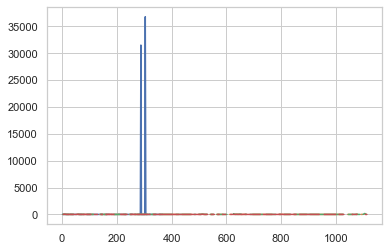

In [23]:
df_all.loc[df_all['End_Point'] == 'MOV1',:]['BMD10'].plot()
df_all.loc[df_all['End_Point'] == 'MOV2',:]['BMD10'].plot()
df_all.loc[df_all['End_Point'] == 'MOV3',:]['BMD10'].plot()
df_all.loc[df_all['End_Point'] == 'MOV4',:]['BMD10'].plot()
#plt.ylim((0, 100))

ValueError: x and y must have same first dimension, but have shapes (10,) and (1000,)

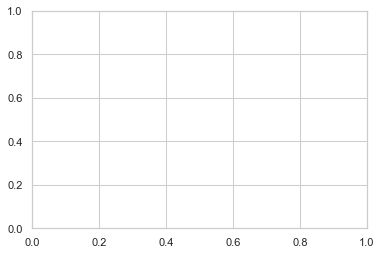

In [21]:
raw = (np.random.random(1000) - 0.5).cumsum()
smooth = raw.reshape(-1,10).mean(axis=1)

plt.plot(chemical_ID_per_AUC1_with_highest_BMD10, raw)
plt.plot(chemical_ID_per_AUC2_with_highest_BMD10, smooth)
plt.show()

In [ ]:
## MOV
#full_devel = "full"
full_devel = "devel"

if (full_devel == "full"):
    chemical_id_from_here = np.unique(df_all['Chemical_ID'])
else:
    chemical_id_from_here = [1031]

for chemical_id in chemical_id_from_here:
    print ("\n\nchemical_id:", chemical_id)
    array = []
    df_per_chemical = df_all.loc[df_all['Chemical_ID'] == chemical_id]
    
    df_per_chemical_MOV1 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV1']
    array.append(float(df_per_chemical_MOV1['BMD10']))
    
    df_per_chemical_MOV2 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV2']
    array.append(float(df_per_chemical_MOV2['BMD10']))
    
    df_per_chemical_MOV3 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV3']
    array.append(float(df_per_chemical_MOV3['BMD10']))
    
    df_per_chemical_MOV4 = df_per_chemical.loc[df_per_chemical['End_Point'] == 'MOV4']
    array.append(float(df_per_chemical_MOV4['BMD10']))
    
    display(np.mean(array))
    display(np.std(array))

#    display(df_per_chemical_AUC2.tail())

In [ ]:
df_temp = df_all.rename(columns={"End_Point": "BMD10_from_this_End_Point"})
df_temp.groupby(['BMD10_from_this_End_Point'])['BMD10'].describe()

#df_temp = df_temp['BMD10']
#df_temp.head()

In [ ]:
df_all.loc[df_all['End_Point'] == 'AUC1',:]['BMD10'].plot()
df_all.loc[df_all['End_Point'] == 'AUC2',:]['BMD10'].plot()
df_all.loc[df_all['End_Point'] == 'AUC3',:]['BMD10'].plot()
df_all.loc[df_all['End_Point'] == 'AUC4',:]['BMD10'].plot()
#plt.ylim((0, 100))

In [ ]:
#plt.plot(df_all.loc[df_all['End_Point'] == 'AUC1',:]['BMD10'].array)


In [ ]:
df_all.loc[df_all['End_Point'] == 'AUC3',:]['BMD10'].describe()

In [ ]:
df_all.loc[df_all['End_Point'] == 'AUC1',:]['BMD10'].plot.box()

In [ ]:
plt.plot(df_all.loc[df_all['End_Point'] == 'AUC1',:]['BMD10'].array) # plotting by columns
plt.show()

In [ ]:
df_for_hist = pd.DataFrame()
df_for_hist['AUC1'] = df_all.loc[df_all['End_Point'] == 'AUC1',:]['BMD10'].array
df_for_hist['AUC2'] = df_all.loc[df_all['End_Point'] == 'AUC2',:]['BMD10'].array
ax = df_for_hist.plot.hist(bins=12, alpha=0.5)

In [ ]:
# matplotlib histogram
plt.hist(df_all.loc[df_all['End_Point'] == 'AUC1',:]['BMD10'], color = 'blue', edgecolor = 'black',
         bins = int(180/5))

# seaborn histogram
#sns.distplot(df_all.loc[df_all['End_Point'] == 'AUC1',:]['BMD10'], hist=True, kde=False, 
#             bins=int(180/5), color = 'blue',
#             hist_kws={'edgecolor':'black'})
# Add labels
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

In [ ]:
num_of_bins = 20

fig, ax = plt.subplots()
ax.hist(df_BMD10_from_AUC1.array, color='blue', edgecolor='black', alpha=0.1)
ax.set_title("Histogram")
ax.set_xlabel("X axis")

ax.set_ylabel("BMD10_from_AUC1")
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data)))

#ax1 = ax.twinx()
#ax1.hist(df_BMD10_from_AUC2.array, bins=num_of_bins, color='orange', edgecolor='black', alpha=0.1)
#ax1.set_ylabel("BMD10_from_AUC2")
#ax1.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=len(data2)))

plt.show()

In [ ]:
dist = pd.DataFrame(
...     np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
...     columns=['a', 'b'])
>>> dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['df_BMD10_from_AUC1']

n, bins, patches = plt.hist(df_BMD10_from_AUC1.array)
plt.show()

# ax.bar(langs,df_BMD10_from_AUC1.array)
# plt.show()